In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

In [8]:
df=pd.read_csv("data/stud.csv")

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
X=df.drop(columns=['math_score'],axis=1)
y=df['math_score']

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns

onehotencoder=OneHotEncoder()
scaler=StandardScaler()

processor=ColumnTransformer([("OneHotEncoder",onehotencoder,cat_features),
                              ("StandardScaler",scaler,num_features)])

In [22]:
X=processor.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [30]:
def score(true,predicted):
    r2=r2_score(true,predicted)
    return r2

In [40]:
from sklearn.metrics import r2_score

models={ 
        
        'Random Forest': RandomForestRegressor(),
        "Decision TreeRegressor":DecisionTreeRegressor(),
        "AdaBoost Regressor":AdaBoostRegressor(),
        "XGBoost":XGBRegressor(),
        "Linear Regression":LinearRegression(),
        "KNeighbors Regressor":KNeighborsRegressor()
        
        
        }


for name,model in models.items():
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        print(f"{name} with score is {r2_score(y_test,y_pred)}")

Random Forest with score is 0.8539361383902234
Decision TreeRegressor with score is 0.7550735929882008
AdaBoost Regressor with score is 0.8499287624724996
XGBoost with score is 0.821589469909668
Linear Regression with score is 0.8804332983749564
KNeighbors Regressor with score is 0.7834456049682252


In [43]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)




LinearRegression()

In [44]:
y_pred=regression.predict(X_test)

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

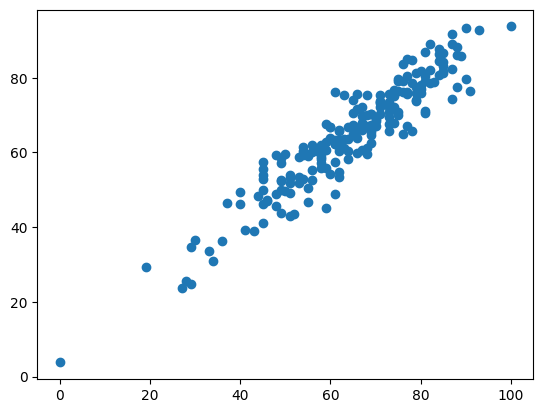

In [55]:
plt.scatter(y_test,y_pred)